In [1]:
try:
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import tensorflow as tf
    import sys
    import os

    # Add the main directory (where common.py is located) to the Python path
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
    from common_functions import data_validation_filtering,kWh_validation
    from tensorflow import keras
    from tensorflow.keras import layers
    print("tensorflow version:",tf.__version__)
    np.set_printoptions(precision=3, suppress=True)
except Exception as e:
    print("error in importing :",e)

tensorflow version: 2.17.0


In [2]:
raw_dataset = pd.read_csv(r"C:\Users\HARSH\Downloads/surbhi.csv")
df = raw_dataset.copy()

In [3]:
print("null:",df.isna().sum().sum())
print("shape:",df.shape)
df.info()

null: 0
shape: (5000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0    FlatID    5000 non-null   float64
 1   kWh        5000 non-null   int64  
 2   R_Voltage  5000 non-null   float64
 3   Y_Voltage  5000 non-null   float64
 4   B_Voltage  5000 non-null   float64
 5   R_Current  5000 non-null   float64
 6   Y_Current  5000 non-null   float64
 7   B_Current  5000 non-null   float64
 8   R_PF       5000 non-null   float64
 9   Y_PF       5000 non-null   float64
 10  B_PF       5000 non-null   float64
 11  Frequency  5000 non-null   float64
 12  Load_kW    5000 non-null   float64
 13  Load_kVA   5000 non-null   float64
 14  Date_Time  5000 non-null   object 
dtypes: float64(13), int64(1), object(1)
memory usage: 586.1+ KB


In [4]:
df.drop(" FlatID",axis= 1,inplace= True)
df['Date_Time'] = pd.to_datetime(df['Date_Time'],dayfirst=True)
df.set_index("Date_Time", drop= True, inplace= True)
df.sort_index(inplace=True)
df.head()

,kWh,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,R_PF,Y_PF,B_PF,Frequency,Load_kW,Load_kVA
Date_Time,,,,,,,,,,,,,
2024-06-11 19:52:00,2150,232.4,230.9,230.7,0.08,0.58,0.06,1.0,0.82,1.00,50.00,0.13,0.15
2024-06-11 19:58:00,2150,232.6,230.8,230.8,0.08,0.58,0.06,1.0,0.81,0.92,49.96,0.13,0.15
2024-06-11 20:03:00,2150,234.0,231.8,232.1,0.08,0.58,0.06,1.0,0.81,0.92,50.04,0.13,0.15
2024-06-11 20:09:00,2150,233.4,231.8,231.8,0.08,0.58,0.06,1.0,0.81,0.92,50.03,0.13,0.15
2024-06-11 20:14:00,2150,233.5,231.7,231.9,0.09,0.58,0.06,1.0,0.81,0.92,49.98,0.13,0.15


In [5]:
clean_df = data_validation_filtering(df.copy())
final_df = kWh_validation(clean_df)
# print("null:",final_df.isna().sum().sum())
final_df

d:\RND\TenserFlow\common_functions.py:78: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sensor_df = clean_df.resample(rule="1H").bfill()


,consumed_unit,lag1,lag2,lag3,lag4,day,hour,month,dayofweek,dayofyear
0,0.0,0.0,0.0,0.0,0.0,11,20,6,1,163
1,0.0,0.0,0.0,0.0,0.0,11,21,6,1,163
2,2.0,0.0,0.0,0.0,0.0,11,22,6,1,163
3,3.0,0.0,0.0,0.0,0.0,11,23,6,1,163
4,2.0,0.0,0.0,0.0,0.0,12,0,6,2,164
...,...,...,...,...,...,...,...,...,...,...
455,1.0,0.0,0.0,0.0,0.0,30,19,6,6,182
456,0.0,0.0,0.0,1.0,0.0,30,20,6,6,182
457,0.0,0.0,0.0,0.0,1.0,30,21,6,6,182
458,2.0,0.0,0.0,0.0,0.0,30,22,6,6,182


In [6]:
column_indices = {name: i for i, name in enumerate(final_df.columns)}
column_indices
n = len(final_df)
train_df = final_df[0:int(n*0.7)]
val_df = final_df[int(n*0.7):int(n*0.9)]
test_df = final_df[int(n*0.9):]

num_features = final_df.shape[1]

In [7]:
train_df

,consumed_unit,lag1,lag2,lag3,lag4,day,hour,month,dayofweek,dayofyear
0,0.0,0.0,0.0,0.0,0.0,11,20,6,1,163
1,0.0,0.0,0.0,0.0,0.0,11,21,6,1,163
2,2.0,0.0,0.0,0.0,0.0,11,22,6,1,163
3,3.0,0.0,0.0,0.0,0.0,11,23,6,1,163
4,2.0,0.0,0.0,0.0,0.0,12,0,6,2,164
...,...,...,...,...,...,...,...,...,...,...
317,1.0,0.0,0.0,1.0,2.0,25,1,6,1,177
318,1.0,0.0,0.0,2.0,1.0,25,2,6,1,177
319,0.0,0.0,0.0,1.0,2.0,25,3,6,1,177
320,1.0,0.0,0.0,1.0,1.0,25,4,6,1,177


In [8]:
val_df

,consumed_unit,lag1,lag2,lag3,lag4,day,hour,month,dayofweek,dayofyear
322,0.0,0.0,0.0,1.0,2.0,25,6,6,1,177
323,1.0,0.0,0.0,1.0,1.0,25,7,6,1,177
324,1.0,0.0,0.0,1.0,2.0,25,8,6,1,177
325,1.0,0.0,0.0,1.0,2.0,25,9,6,1,177
326,2.0,0.0,0.0,3.0,2.0,25,10,6,1,177
...,...,...,...,...,...,...,...,...,...,...
409,0.0,0.0,0.0,0.0,0.0,28,21,6,4,180
410,1.0,0.0,0.0,1.0,1.0,28,22,6,4,180
411,0.0,0.0,0.0,1.0,2.0,28,23,6,4,180
412,1.0,0.0,0.0,0.0,2.0,29,0,6,5,181


In [9]:
test_df

,consumed_unit,lag1,lag2,lag3,lag4,day,hour,month,dayofweek,dayofyear
414,0.0,0.0,0.0,1.0,1.0,29,2,6,5,181
415,0.0,0.0,0.0,0.0,1.0,29,3,6,5,181
416,1.0,0.0,0.0,0.0,0.0,29,4,6,5,181
417,0.0,0.0,0.0,0.0,1.0,29,5,6,5,181
418,0.0,0.0,0.0,0.0,1.0,29,6,6,5,181
419,1.0,0.0,0.0,1.0,1.0,29,7,6,5,181
420,0.0,0.0,0.0,0.0,0.0,29,8,6,5,181
421,0.0,0.0,0.0,0.0,0.0,29,9,6,5,181
422,1.0,0.0,0.0,0.0,0.0,29,10,6,5,181
423,1.0,0.0,0.0,1.0,1.0,29,11,6,5,181


In [10]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
consumed_unit,322.0,1.239130,0.907887,0.0,1.0,1.0,2.0,5.0
lag1,322.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
lag2,322.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
lag3,322.0,1.155280,0.947592,0.0,0.0,1.0,2.0,5.0
lag4,322.0,0.757764,0.952298,0.0,0.0,0.0,2.0,4.0
day,322.0,18.043478,3.889995,11.0,15.0,18.0,21.0,25.0
hour,322.0,11.456522,7.028622,0.0,5.0,11.0,18.0,23.0
month,322.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
dayofweek,322.0,3.086957,2.001219,0.0,1.0,3.0,5.0,6.0
dayofyear,322.0,170.043478,3.889995,163.0,167.0,170.0,173.0,177.0


In [11]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('consumed_unit')
test_labels = test_features.pop('consumed_unit')

In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [13]:
normalizer.adapt(np.array(train_features))

In [14]:
print(normalizer.mean.numpy())

[[  0.      0.      1.155   0.758  18.043  11.457   6.      3.087 170.043]]


In [15]:
first = np.array(train_features[:10])

with np.printoptions(precision=2, suppress=True):
  print('First example:\n', first)
  print()
  print('Normalized:\n', normalizer(first).numpy())

First example:
 [[  0.   0.   0.   0.  11.  20.   6.   1. 163.]
 [  0.   0.   0.   0.  11.  21.   6.   1. 163.]
 [  0.   0.   0.   0.  11.  22.   6.   1. 163.]
 [  0.   0.   0.   0.  11.  23.   6.   1. 163.]
 [  0.   0.   0.   0.  12.   0.   6.   2. 164.]
 [  0.   0.   0.   0.  12.   1.   6.   2. 164.]
 [  0.   0.   0.   0.  12.   2.   6.   2. 164.]
 [  0.   0.   0.   0.  12.   3.   6.   2. 164.]
 [  0.   0.   0.   0.  12.   4.   6.   2. 164.]
 [  0.   0.   0.   0.  12.   5.   6.   2. 164.]]

Normalized:
 [[ 0.    0.   -1.22 -0.8  -1.81  1.22  0.   -1.04 -1.81]
 [ 0.    0.   -1.22 -0.8  -1.81  1.36  0.   -1.04 -1.81]
 [ 0.    0.   -1.22 -0.8  -1.81  1.5   0.   -1.04 -1.81]
 [ 0.    0.   -1.22 -0.8  -1.81  1.64  0.   -1.04 -1.81]
 [ 0.    0.   -1.22 -0.8  -1.56 -1.63  0.   -0.54 -1.56]
 [ 0.    0.   -1.22 -0.8  -1.56 -1.49  0.   -0.54 -1.56]
 [ 0.    0.   -1.22 -0.8  -1.56 -1.35  0.   -0.54 -1.56]
 [ 0.    0.   -1.22 -0.8  -1.56 -1.21  0.   -0.54 -1.56]
 [ 0.    0.   -1.22 -0.8  -1.56 -

In [16]:
forecasting = np.array(train_features)

forecasting_normalizer = layers.Normalization(axis=None)
forecasting_normalizer.adapt(forecasting)

In [17]:
forecasting_model = tf.keras.Sequential([
    forecasting_normalizer,
    layers.Dense(units=1)
])

forecasting_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (322, 9)               │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (16.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3 (16.00 B)

In [18]:
forecasting_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[0.437],
       [0.422],
       [0.407],
       [0.393],
       [0.742],
       [0.727],
       [0.713],
       [0.698],
       [0.683],
       [0.669]], dtype=float32)

In [19]:
forecasting_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [20]:
%%time
history = forecasting_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 9.14 s
Wall time: 8.08 s


In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.702528,0.679413,95
96,0.716124,0.675040,96
97,0.782538,0.679581,97
98,0.776602,0.699420,98
99,0.699930,0.675562,99


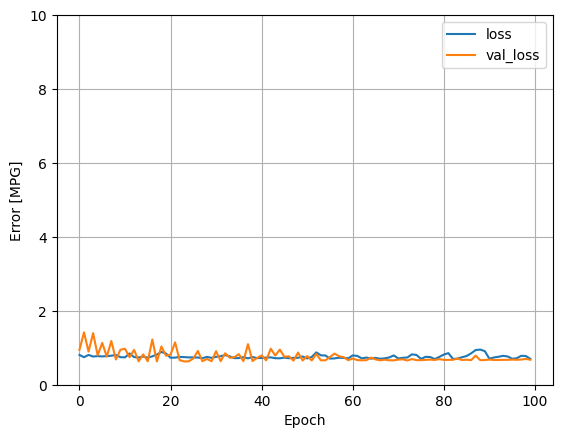

In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [23]:
test_results = {}

test_results['forecasting_model'] = forecasting_model.evaluate(
    test_features,
    test_labels, verbose=0)

In [24]:
x = tf.linspace(0.0, 250, 251)
y = forecasting_model.predict(x)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (10, 9), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [25]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [26]:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[0.496],
       [0.491],
       [0.487],
       [0.483],
       [0.379],
       [0.375],
       [0.371],
       [0.366],
       [0.362],
       [0.358]], dtype=float32)

In [27]:
linear_model.layers[1].kernel

<KerasVariable shape=(9, 1), dtype=float32, path=sequential_1/dense_1/kernel>

In [28]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [35]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 7.75 s
Wall time: 6.96 s


In [36]:
test_results['linear_model'] = linear_model.evaluate(
test_features, test_labels, verbose=0)

In [37]:
test_results

{'forecasting_model': 0.6378691792488098, 'linear_model': 0.6746999621391296}